In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [2]:
data_df = pd.read_csv('model 2 dataset.csv')

In [3]:
label_encoder = LabelEncoder()

In [4]:
data_df['Country'] = label_encoder.fit_transform(data_df['Country'])

In [5]:
data_df['Quarter'] = data_df['Quarter'].map({'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4})

In [6]:
scaler = MinMaxScaler()


data_df[['Wildlife Population', 'Deforestation Rate', 'Avg. Temperature (°C)', 'Avg. Humidity (%)', 'Livestock Population Density']] = scaler.fit_transform(
    data_df[['Wildlife Population', 'Deforestation Rate', 'Avg. Temperature (°C)', 'Avg. Humidity (%)', 'Livestock Population Density']]
)

In [7]:
print(data_df)

     Country  Year  Quarter  Wildlife Population  Deforestation Rate  \
0          0  2015        1             0.458333            0.500000   
1          0  2015        2             0.500000            0.500000   
2          0  2015        3             0.458333            0.500000   
3          0  2015        4             0.500000            0.500000   
4          0  2016        1             0.500000            0.500000   
..       ...   ...      ...                  ...                 ...   
411        6  2021        4             0.208333            0.333333   
412        6  2022        1             0.166667            0.333333   
413        6  2022        2             0.208333            0.333333   
414        6  2022        3             0.208333            0.333333   
415        6  2022        4             0.208333            0.333333   

     Avg. Temperature (°C)  Avg. Humidity (%)  Outbreak Occurred (0/1)  \
0                 0.444444               0.62                

In [9]:
X = data_df[['Wildlife Population', 'Deforestation Rate', 'Avg. Temperature (°C)', 
        'Avg. Humidity (%)','Livestock Population Density', 'Proximity to Water Sources', 'Species Specificity']]
y = data_df['Outbreak Occurred (0/1)']

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))


Accuracy: 90.48%
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        76
           1       0.00      0.00      0.00         8

    accuracy                           0.90        84
   macro avg       0.45      0.50      0.48        84
weighted avg       0.82      0.90      0.86        84



c:\Users\Winston Moyo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Winston Moyo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Winston Moyo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

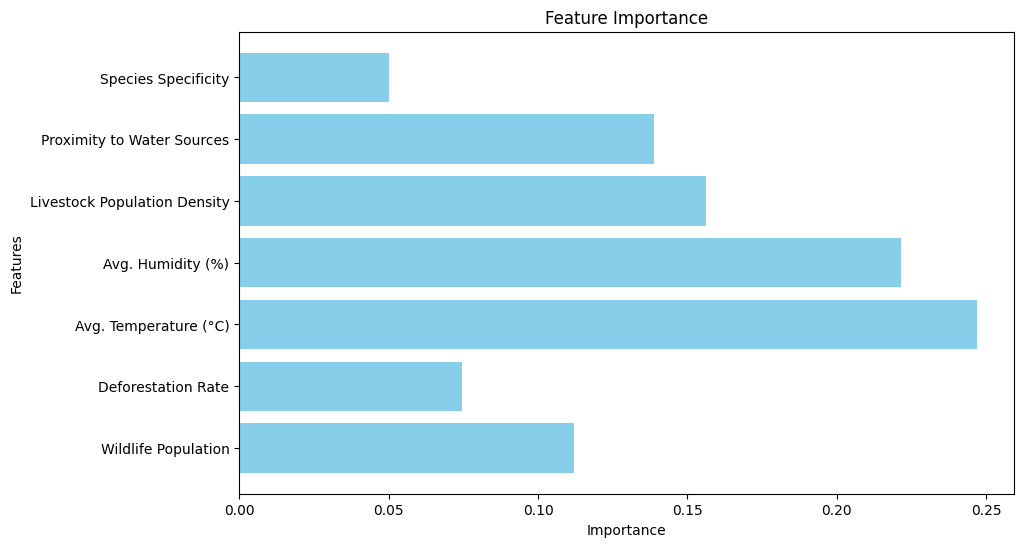

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [13]:
import joblib

joblib.dump(model, 'model2.pkl')

['model2.pkl']

In [16]:
X_test.to_csv('Model 2 Dataset Prepared.csv', index=False)

In [17]:
y_test.to_csv('Ensemble Output Values.csv', index=False)